In [167]:
# Capstone A Project - Spring 2020
# Kaggle Attrition data - Exploratory Data Analysis Python Code 
# Reference URL:  https://www.kaggle.com/abhishektibrewal/hr-employee-attrition

# data transformation
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime

# data plotting
import seaborn as sns
from matplotlib import pyplot as plt

# classification & correlation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt
import xgboost as xgb




In [168]:
## Importing data from an Excel file:
## Prior to loading the file, convert it to csv in Excel 
## Setting datatypes prior to load

## updated data types to match types in IBM's as listed here:  
## http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

datatypes = {
"Age": "int",
"Attrition": "category",
"BusinessTravel": "category",
"DailyRate": "int",
"Department": "category",
"DistanceFromHome": "int",
"Education": "int", ## changed to int
"EducationField": "category",
"EmployeeCount": "int",
"EmployeeNumber": "int",
"EnvironmentSatisfaction": "int", ## changed
"Gender": "category",
"HourlyRate": "int",
"JobInvolvement": "int", ## changed
"JobLevel": "int", #changed
"JobRole": "category",
"JobSatisfaction": "int", ## changed
"MaritalStatus": "category",
"MonthlyIncome": "int",
"MonthlyRate": "int",
"NumCompaniesWorked": "int",
"Over18": "category",
"OverTime": "category",
"PercentSalaryHike": "float",
"PerformanceRating": "int", ## changed
"RelationshipSatisfaction": "int", ## changed
"StandardHours": "int",
"StockOptionLevel": "int",  ## changed
"TotalWorkingYears": "int",
"TrainingTimesLastYear": "int",
"WorkLifeBalance": "int", #changed
"YearsAtCompany": "int",
"YearsInCurrentRole": "int",
"YearsSinceLastPromotion": "int",
"YearsWithCurrManager": "int"
}

df = pd.read_csv('C:\DataSets\WA_Fn-UseC_-HR-Employee-Attrition.csv', dtype=datatypes)


# Verifying the upload of the data looking at the first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [169]:
# Verifying the upload of the data looking at the last 5 rows

df.tail()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [170]:
# Verifying the dimensions of the data set - (rows, cols)

df.shape

(1470, 35)

In [171]:
# Check what data types the features are

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int32
Attrition                   1470 non-null category
BusinessTravel              1470 non-null category
DailyRate                   1470 non-null int32
Department                  1470 non-null category
DistanceFromHome            1470 non-null int32
Education                   1470 non-null int32
EducationField              1470 non-null category
EmployeeCount               1470 non-null int32
EmployeeNumber              1470 non-null int32
EnvironmentSatisfaction     1470 non-null int32
Gender                      1470 non-null category
HourlyRate                  1470 non-null int32
JobInvolvement              1470 non-null int32
JobLevel                    1470 non-null int32
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null int32
MaritalStatus               1470 non-null category
MonthlyI

In [172]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [173]:
# Retrieve simple statistics from the data set

df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [174]:
# Exploring our Age feature

df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [175]:
# Exploring our Age feature

df.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

(array([ 97., 358., 451., 291., 167., 106.]),
 array([18., 25., 32., 39., 46., 53., 60.]),
 <a list of 6 Patch objects>)

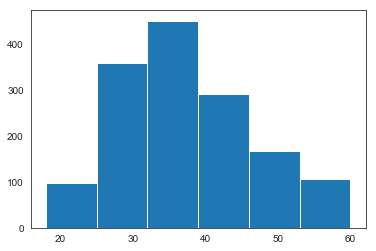

In [176]:
## Let's look at the Age distribution via a histogram

plt.hist(df.Age, bins = 6)

In [177]:
list(df)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [178]:
## In order to get familiarized with data set, we are displaying categorical frequency groupings for:
## categorical features 
## some numerical features with levels 
## target label (Y - Attrition)

##### Categorical Features   #####

## Attrition Frequency
df_byAttrition = df.groupby(['Attrition'])
print(df_byAttrition.Attrition.count())
print(" ")
print(" ")

## BusinessTravel Frequency
df_byBusinessTravel = df.groupby(['BusinessTravel'])
print(df_byBusinessTravel.BusinessTravel.count())
print(" ")
print(" ")

## Department Frequency
df_byDepartment = df.groupby(['Department'])
print(df_byDepartment.Department.count())
print(" ")
print(" ")

## Education Field Frequency Table
df_byEducationField = df.groupby(['EducationField'])
print(df_byEducationField .EducationField.count())
print(" ")
print(" ")

## Gender Frequency Table
df_byGender = df.groupby(['Gender'])
print(df_byGender.Gender.count())
print(" ")
print(" ")

## JobRole Frequency Table
df_byJobRole = df.groupby(['JobRole'])
print(df_byJobRole.JobRole.count())
print(" ")
print(" ")

## MaritalStatus  Frequency Table
df_byMaritalStatus  = df.groupby(['MaritalStatus'])
print(df_byMaritalStatus.MaritalStatus.count())
print(" ")
print(" ")

## Over18  Frequency Table
df_byOver18  = df.groupby(['Over18'])
print(df_byOver18.Over18.count())
print(" ")
print(" ")

## OverTime  Frequency Table
df_byOverTime  = df.groupby(['OverTime'])
print(df_byOverTime.OverTime.count())
print(" ")
print(" ")





#### Numerical features with levels  ####
print("Numerical features with levels")
print(" ")
print(" ")



## Education Frequency
df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

## df_byEnvironmentSatisfaction Frequency Table
df_byEnvironmentSatisfaction = df.groupby(['EnvironmentSatisfaction'])
print(df_byEnvironmentSatisfaction.EnvironmentSatisfaction.count())
print(" ")
print(" ")

## JobInvolvement Frequency Table
df_byJobInvolvement = df.groupby(['JobInvolvement'])
print(df_byJobInvolvement.JobInvolvement.count())
print(" ")
print(" ")

## JobLevel Frequency Table
df_byJobLevel = df.groupby(['JobLevel'])
print(df_byJobLevel.JobLevel.count())
print(" ")
print(" ")

## JobSatisfaction Frequency Table
df_byJobSatisfaction = df.groupby(['JobSatisfaction'])
print(df_byJobSatisfaction.JobSatisfaction.count())
print(" ")
print(" ")

## PerformanceRating  Frequency Table
df_byPerformanceRating  = df.groupby(['PerformanceRating'])
print(df_byPerformanceRating.PerformanceRating.count())
print(" ")
print(" ")

## RelationshipSatisfaction  Frequency Table
df_byRelationshipSatisfaction  = df.groupby(['RelationshipSatisfaction'])
print(df_byRelationshipSatisfaction.RelationshipSatisfaction.count())
print(" ")
print(" ")

## StockOptionLevel  Frequency Table
df_byStockOptionLevel  = df.groupby(['StockOptionLevel'])
print(df_byStockOptionLevel.StockOptionLevel.count())
print(" ")
print(" ")

## WorkLifeBalance  Frequency Table
df_byWorkLifeBalance  = df.groupby(['WorkLifeBalance'])
print(df_byWorkLifeBalance.WorkLifeBalance.count())
print(" ")
print(" ")



Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
 
 
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64
 
 
Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64
 
 
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: EducationField, dtype: int64
 
 
Gender
Female    588
Male      882
Name: Gender, dtype: int64
 
 
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
Name: JobRole, dtype: int64
 
 
MaritalStatus
Divorced    327
Married     673
Single      470
N

In [179]:
## Reducing levels in Education feature from 5(five) to 4 (four) levels

df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

i = 0
while (i < df.Education.count()):
   ##print ("The Education value is:", df.Education[i])
   if df.Education[i] == 5:
     df.Education[i] = 4
   i = i + 1


df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

Education
1    170
2    282
3    572
4    398
5     48
Name: Education, dtype: int64
 
 


C:\Users\solan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Education
1    170
2    282
3    572
4    446
Name: Education, dtype: int64
 
 


In [180]:
## One-hot encoding of categorical features using the dummies function

categorical_fields = list(df.drop(
    columns = ["Age", 
               "DailyRate", 
               "DistanceFromHome",
               "Education", ##
               "EmployeeCount",
               "EmployeeNumber", ## Emp ID
               "EnvironmentSatisfaction", ##
               "HourlyRate", 
               "JobInvolvement", ##
               "JobLevel", ##
               "JobSatisfaction",  ##
               "MonthlyIncome",
               "MonthlyRate",
               "NumCompaniesWorked",
               "PercentSalaryHike",
               "PerformanceRating", ##
               "RelationshipSatisfaction", ##
               "StandardHours",
               "StockOptionLevel", ##
               "TotalWorkingYears",
               "TrainingTimesLastYear",
               "WorkLifeBalance",
               "YearsAtCompany",
               "YearsInCurrentRole",          
               "YearsSinceLastPromotion",     
               "YearsWithCurrManager"        
              ]).select_dtypes(
    include=['category']).columns)


print(categorical_fields)


# Creating dummy variables for their levels
dfOneHot = pd.get_dummies(df, columns = categorical_fields).drop(
    columns = ["Age", 
               "DailyRate", 
               "DistanceFromHome",
               "Education", ##
               "EmployeeCount",
               "EmployeeNumber", ## Emp ID
               "EnvironmentSatisfaction", ##
               "HourlyRate", 
               "JobInvolvement", ##
               "JobLevel", ##
               "JobSatisfaction",  ##
               "MonthlyIncome",
               "MonthlyRate",
               "NumCompaniesWorked",
               "PercentSalaryHike",
               "PerformanceRating", ##
               "RelationshipSatisfaction", ##
               "StandardHours",
               "StockOptionLevel", ##
               "TotalWorkingYears",
               "TrainingTimesLastYear",
               "WorkLifeBalance",
               "YearsAtCompany",
               "YearsInCurrentRole",          
               "YearsSinceLastPromotion",     
               "YearsWithCurrManager" 
              ])


## Verify the OneHot Encoding.
print("Shape after one-hot encoding categorical variables: ", dfOneHot.shape)
print(" ")

print(dfOneHot.info())





['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Shape after one-hot encoding categorical variables:  (1470, 31)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Attrition_No                         1470 non-null uint8
Attrition_Yes                        1470 non-null uint8
BusinessTravel_Non-Travel            1470 non-null uint8
BusinessTravel_Travel_Frequently     1470 non-null uint8
BusinessTravel_Travel_Rarely         1470 non-null uint8
Department_Human Resources           1470 non-null uint8
Department_Research & Development    1470 non-null uint8
Department_Sales                     1470 non-null uint8
EducationField_Human Resources       1470 non-null uint8
EducationField_Life Sciences         1470 non-null uint8
EducationField_Marketing             1470 non-null uint8
EducationField_Medical               1470 non-null uint8
EducationField_Othe

In [181]:
## Preprocessing, Label Encoding Attrition, the Target Label, and non-numerical value features to add to correlation matrix and
## AttritionOne will be used as the Target label in  XGBoster classifier


le = preprocessing.LabelEncoder()

AttritionOne       = le.fit_transform(df.Attrition)
BusinessTravelOne  = le.fit_transform(df.BusinessTravel)
DepartmentOne      = le.fit_transform(df.Department)
EducationFieldOne  = le.fit_transform(df.EducationField)
GenderOne          = le.fit_transform(df.Gender)
JobRoleOne         = le.fit_transform(df.JobRole)
MaritalStatusOne   = le.fit_transform(df.MaritalStatus)
Over18One          = le.fit_transform(df.Over18)
OverTimeOne        = le.fit_transform(df.OverTime)



df2 = pd.DataFrame({'AttritionOne':AttritionOne.tolist(),
                    'BusinessTravelOne':BusinessTravelOne.tolist(),
                    'DepartmentOne':DepartmentOne.tolist(),
                    'EducationFieldOne':EducationFieldOne.tolist(),
                    'GenderOne':GenderOne.tolist(),
                    'JobRoleOne':JobRoleOne.tolist(),
                    'MaritalStatusOne':MaritalStatusOne.tolist(),
                    'Over18One':Over18One.tolist(),
                    'OverTimeOne':OverTimeOne.tolist()
                   })

df3 = pd.concat([df, df2], axis=1)

## print(df2.AttritionOne)




In [182]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
Age                         1470 non-null int32
Attrition                   1470 non-null category
BusinessTravel              1470 non-null category
DailyRate                   1470 non-null int32
Department                  1470 non-null category
DistanceFromHome            1470 non-null int32
Education                   1470 non-null int32
EducationField              1470 non-null category
EmployeeCount               1470 non-null int32
EmployeeNumber              1470 non-null int32
EnvironmentSatisfaction     1470 non-null int32
Gender                      1470 non-null category
HourlyRate                  1470 non-null int32
JobInvolvement              1470 non-null int32
JobLevel                    1470 non-null int32
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null int32
MaritalStatus               1470 non-null category
MonthlyI

In [183]:
# Let's explore correlations between features

corr = df3.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,AttritionOne,BusinessTravelOne,DepartmentOne,EducationFieldOne,GenderOne,JobRoleOne,MaritalStatusOne,Over18One,OverTimeOne
Age,1.000000,0.010661,-0.001686,0.208334,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.202089,-0.159205,0.024751,-0.031882,-0.040873,-0.036311,-0.122427,-0.095029,NaN,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016309,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.026363,-0.056652,-0.004086,0.007109,0.037709,-0.011716,-0.009472,-0.069586,NaN,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.016755,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.014406,0.077924,-0.024469,0.017225,0.002013,-0.001851,-0.001015,-0.014437,NaN,0.025514
Education,0.208334,-0.016309,0.016755,1.000000,NaN,0.044472,-0.026258,0.013469,0.039844,0.093198,...,0.067478,-0.027852,0.002018,0.009100,-0.038108,-0.013438,0.004182,0.002995,NaN,-0.022067
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.044472,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.009197,-0.010577,-0.015578,-0.010895,-0.002516,0.022556,-0.010336,-0.008155,NaN,-0.024037
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.026258,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.004999,-0.103369,0.004174,-0.019395,0.043163,0.000508,-0.017321,-0.003593,NaN,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.013469,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.020123,-0.006846,0.026528,-0.004144,-0.021941,-0.000478,-0.018861,-0.017861,NaN,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.039844,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.025976,-0.130016,0.039062,-0.024586,-0.002655,0.017960,0.006616,-0.038497,NaN,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.093198,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.375281,-0.169105,0.019311,0.101963,-0.044933,-0.039403,-0.085457,-0.076769,NaN,0.000544


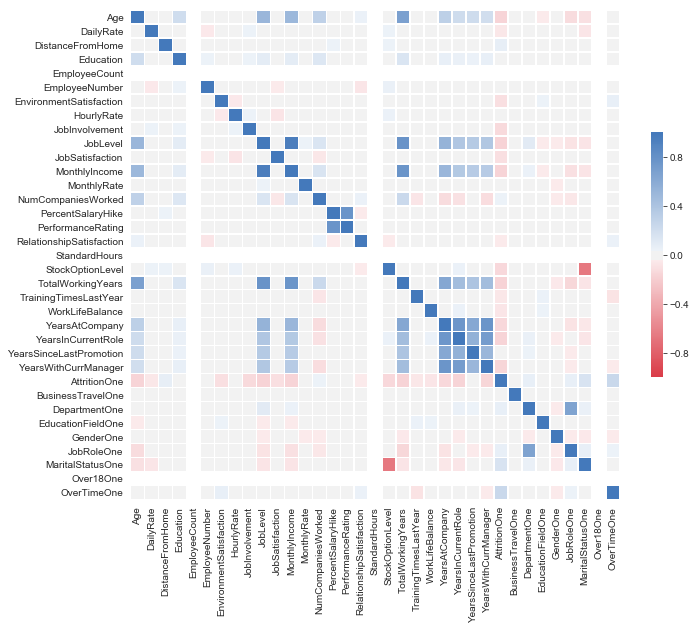

In [184]:
# Mapping feature correlation with a Seaborn heatmap  
# Referenced tutorial:  https://riptutorial.com/seaborn/example/31922/basic-correlation-plot

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, 
        cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, 
        center=0,
        vmin=-1)

XGBooster Model

The open-source XGBoost algorithym was developed by Tianqi Chen. It has become a widely used tool among Data Scientists. Its name stands for eXtreme Gradient Boosting; and it is capable of performing the three main forms of gradient boosting (Gradient Boosting (GB), Stochastic GB and Regularized GB).

Boosting is an ensemble method which creates a strong classifier based on "weak" classifiers. Weak and strong refer to a how correlated are the learners to a target variable, meaning that the errors of the previous model are corrected by the next predictor, iteratively speaking. As opposed to AdaBoost, where a weight is added to the weak learners after iteration, XGBoost uses gradient descent, i.e., the method fits a new model to the new residuals of the previous prediction.




In [185]:
## Preparing data for XGBooster Model
## Removing target label from data set and other non-numeric features from observations
## Target Label - Attrition.  
## Other Features: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime


## dropping the target label and the features that were OneHot encoded 
X = df.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 
'MaritalStatus', 'Over18', 'OverTime'], axis=1)


## concatenating X to dfOneHot
X = pd.concat([X, dfOneHot], axis=1)

print(X)




      Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
5      32       1005                 2          2              1   
6      59       1324                 3          3              1   
7      30       1358                24          1              1   
8      38        216                23          3              1   
9      36       1299                27          3              1   
10     35        809                16          3              1   
11     29        153                15          2              1   
12     31        670                26          1              1   
13     34       1346                19          

In [186]:
## The XGBooster model used the data with a shufflesplit at 80/20 

##%%time


# Splitting the data
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, train_size=0.8)


# Creating the indices 
for trainidx, testidx in cv.split(X, df2.AttritionOne):
    X_train  =  X.iloc[trainidx] 
    X_test   =  X.iloc[testidx] 
    y_train  =  df2.AttritionOne[trainidx]
    y_test   =  df2.AttritionOne[testidx]

# Define the model
AttritionOne_xgbooster = xgb.XGBClassifier(max_depth=5)
AttritionOne_xgbooster.fit(X_train, y_train)

# Output the accuracy
strong_accuracy_test = AttritionOne_xgbooster.score(X_test,y_test)


print("Attrition XGBooster Strong Accuracy at 80/20 CV split: ", strong_accuracy_test)





Attrition XGBooster Strong Accuracy at 80/20 CV split:  1.0
